In [9]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [10]:

df = {} # This will store the DataFrame for gemma3-1b-stats.txt

# --- Define the specific file you want to process ---
file_name = "gemma3-1b-stats.txt"

# Construct the full absolute path to the file
# Using pathlib for cross-platform compatibility and readability
home_directory = Path.home()
file_path_to_process = home_directory / "Downloads" / file_name

# Define the columns that will be in the DataFrame
columns = ['total duration', 'load duration', 'prompt eval count', 'prompt eval duration',
           'prompt eval rate', 'eval count', 'eval duration', 'eval rate']

# The pattern to extract numeric values and time units (h, m, s, ms)
pattern = r"\s(\d+h)?(\d+m)?(\d+(\.?\d+)?)\s*(s|ms)?"

# --- Start processing the single file ---
rows = []
current_row = []

# Check if the file exists before trying to open it
if not os.path.exists(file_path_to_process):
    print(f"Error: The file '{file_path_to_process}' was not found.")
    print("Please ensure the file name is correct and it is located in your default Downloads folder.")
else:
    try:
        with open(file_path_to_process, 'r', errors="replace") as file:
            for line in file:
                result = re.search(pattern, line)
                if not result:
                    continue

                groups = result.groups()

                # Logic to convert extracted groups into seconds
                value_in_seconds = 0.0
                if groups[0] is not None: # Hours
                    hours = int(groups[0][:-1])
                    value_in_seconds += hours * 3600
                if groups[1] is not None: # Minutes
                    minutes = int(groups[1][:-1])
                    value_in_seconds += minutes * 60
                                
                seconds_str = groups[2]
                unit = groups[4] # 's' or 'ms' or None if only seconds without explicit unit

                if unit == "ms":
                    milliseconds = float(seconds_str)
                    value_in_seconds += milliseconds / 1000
                else: # Default to seconds if unit is 's' or not specified
                    value_in_seconds += float(seconds_str)
                
                current_row.append(value_in_seconds)

                # If we have collected enough values for one row, add it and reset
                if len(current_row) == len(columns):
                    rows.append(current_row)
                    current_row = []
        
        # Create a DataFrame for the processed file
        if rows: # Only create DataFrame if there's data
            # Use the simple file_name as the key in the df dictionary
            df[file_name] = pd.DataFrame(rows, columns=columns)
        else:
            print(f"No data found in {file_name} to create a DataFrame (or no lines matched the pattern).")

    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_name}': {e}")

print(df)

# You can now access the DataFrame directly:
# if file_name in df:
#     print("\nDataFrame for gemma3-1b-stats.txt:")
#     print(df[file_name])

{'gemma3-1b-stats.txt':     total duration  load duration  prompt eval count  prompt eval duration  \
0          30.5400         1.0000             8.0000               24.0000   
1           2.0000        30.0000             8.0000                1.1974   
2           2.0000         2.0000             2.5000               60.0000   
3          31.9226         0.2260             0.1609                6.2000   
4           0.2171         0.1597             6.2300                5.0000   
5           0.1601         6.2300             6.0000               14.0000   
6           6.2000         7.0000             0.0000                1.0000   
7           0.0000         1.0000             0.0000                0.0000   
8           0.0000         1.0000            13.0000              501.0000   
9           8.0000        11.0000           135.0000               21.7576   
10         18.0000        76.0000            12.2330                0.2061   
11        125.0000        20.2828       


--- Generating Additional Visualizations ---
Creating a Correlation Heatmap...


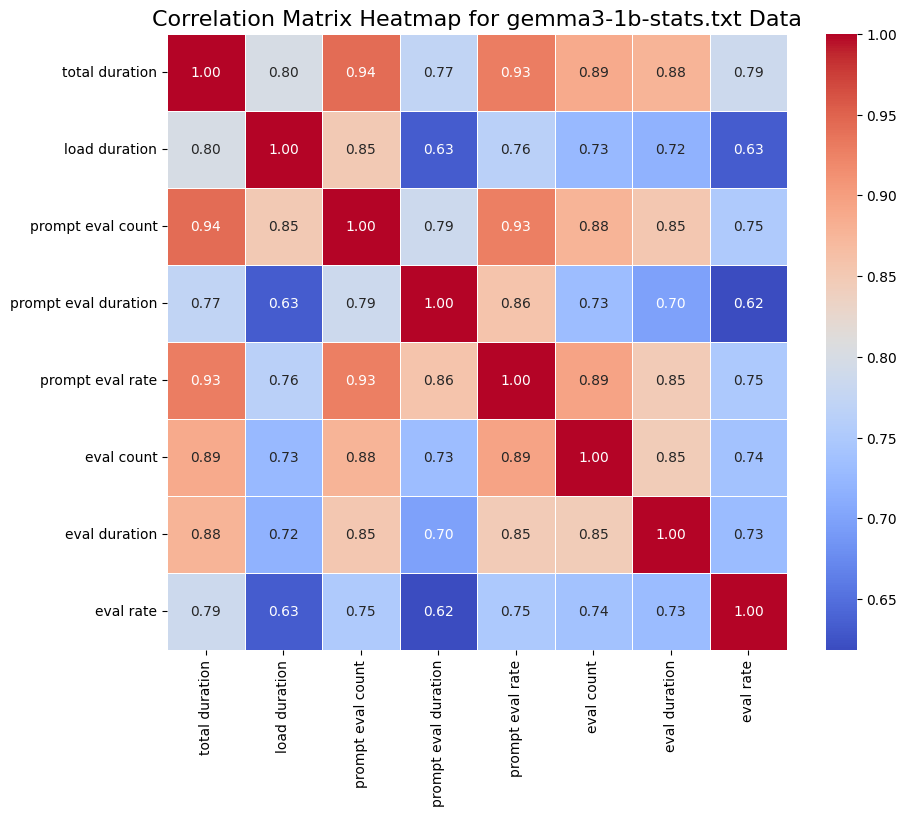

Creating Box Plots for each variable...


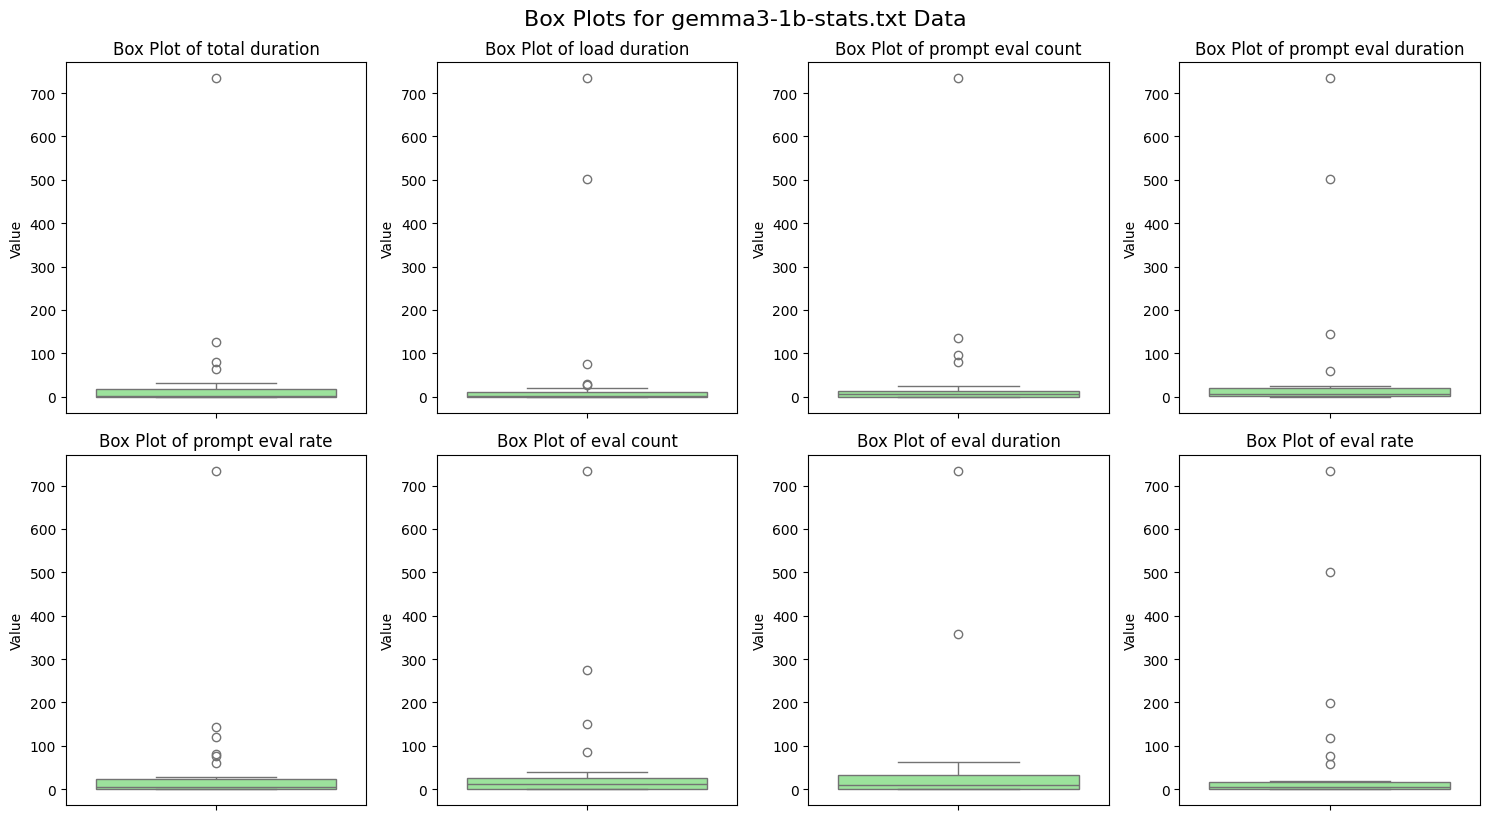

Additional visualizations generated successfully!


In [11]:
data_frame = df.get(file_name, pd.DataFrame()) # Safely get the DataFrame

if not data_frame.empty:
    print("\n--- Generating Additional Visualizations ---")

    # 1. Correlation Heatmap
    print("Creating a Correlation Heatmap...")
    plt.figure(figsize=(10, 8))
    # Calculate the correlation matrix
    correlation_matrix = data_frame.corr()
    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix Heatmap for {file_name} Data', fontsize=16)
    plt.show()

    # 2. Box Plots for each variable
    print("Creating Box Plots for each variable...")
    plt.figure(figsize=(15, 8)) # Adjust figure size
    for i, col in enumerate(data_frame.columns):
        plt.subplot(2, 4, i + 1) # Arrange in 2 rows, 4 columns
        sns.boxplot(y=data_frame[col], color='lightgreen')
        plt.title(f'Box Plot of {col}')
        plt.ylabel('Value')
    plt.tight_layout()
    plt.suptitle(f'Box Plots for {file_name} Data', y=1.02, fontsize=16)
    plt.show()

    print("Additional visualizations generated successfully!")
else:
    print("\nNo data to visualize. Please ensure the main script ran correctly and populated the DataFrame.")

